This notebook cleans the JP Morgan daily stock price data collected from 2000 to 2020.
This was originally supposed to be my capstone data, but my mentor thought the dataset was too small.

Instead, I use the data cleaned in this notebook in the capstone to show how the capstone model can be used to make predictions into the future.

In [1]:
import pandas as pd
import requests
import re
import matplotlib.pyplot as plt
import numpy as np



The dataset comes from a website called Alpha Vantage.
I acquired my own key from there to be able to access their API.

In [2]:
key = 'I2ZWBIOL69PFCZV1'

In [3]:
response = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=JPM&outputsize=full&apikey=key')


After the data is requested, it is normalized and converted into a csv file.

In [4]:
from pandas.io.json import json_normalize

daily_df = json_normalize(response.json())

In [5]:
daily_df

,Meta Data.1. Information,Meta Data.2. Symbol,Meta Data.3. Last Refreshed,Meta Data.4. Output Size,Meta Data.5. Time Zone,Time Series (Daily).2020-02-14.1. open,Time Series (Daily).2020-02-14.2. high,Time Series (Daily).2020-02-14.3. low,Time Series (Daily).2020-02-14.4. close,Time Series (Daily).2020-02-14.5. adjusted close,...,Time Series (Daily).2000-02-15.7. dividend amount,Time Series (Daily).2000-02-15.8. split coefficient,Time Series (Daily).2000-02-14.1. open,Time Series (Daily).2000-02-14.2. high,Time Series (Daily).2000-02-14.3. low,Time Series (Daily).2000-02-14.4. close,Time Series (Daily).2000-02-14.5. adjusted close,Time Series (Daily).2000-02-14.6. volume,Time Series (Daily).2000-02-14.7. dividend amount,Time Series (Daily).2000-02-14.8. split coefficient
0,Daily Time Series with Splits and Dividend Events,JPM,2020-02-14,Full size,US/Eastern,137.8400,138.1900,136.9400,137.4600,137.4600,...,0.0000,1.0000,82.2500,83.4400,79.0600,79.0600,28.4725,3936467,0.0000,1.0000


In [6]:
daily_df.to_csv('data.csv')

In [7]:
response.json()['Time Series (Daily)']

{'2020-02-14': {'1. open': '137.8400',
  '2. high': '138.1900',
  '3. low': '136.9400',
  '4. close': '137.4600',
  '5. adjusted close': '137.4600',
  '6. volume': '6627562',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0000'},
 '2020-02-13': {'1. open': '137.7500',
  '2. high': '138.3400',
  '3. low': '136.4000',
  '4. close': '137.8800',
  '5. adjusted close': '137.8800',
  '6. volume': '7446249',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0000'},
 '2020-02-12': {'1. open': '138.6000',
  '2. high': '139.2850',
  '3. low': '137.8000',
  '4. close': '138.0000',
  '5. adjusted close': '138.0000',
  '6. volume': '7948022',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0000'},
 '2020-02-11': {'1. open': '138.2600',
  '2. high': '138.8200',
  '3. low': '137.7800',
  '4. close': '138.0000',
  '5. adjusted close': '138.0000',
  '6. volume': '6577580',
  '7. dividend amount': '0.0000',
  '8. split coefficient': '1.0000'},
 '2020-02-10': {

The data is then converted into a dataframe, columns are renamed, and datatypes changed.

In [8]:
df = pd.DataFrame(response.json()['Time Series (Daily)'].values())

In [9]:
df

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,137.8400,138.1900,136.9400,137.4600,137.4600,6627562,0.0000,1.0000
1,137.7500,138.3400,136.4000,137.8800,137.8800,7446249,0.0000,1.0000
2,138.6000,139.2850,137.8000,138.0000,138.0000,7948022,0.0000,1.0000
3,138.2600,138.8200,137.7800,138.0000,138.0000,6577580,0.0000,1.0000
4,136.9500,137.8510,136.7500,137.7400,137.7400,5958529,0.0000,1.0000
...,...,...,...,...,...,...,...,...
5028,78.0600,78.5600,74.5600,74.7500,26.9203,5414200,0.0000,1.0000
5029,80.6200,81.5000,77.8100,78.3800,28.2276,3810800,0.0000,1.0000
5030,81.0000,82.1900,79.0000,79.5000,28.6310,3219800,0.0000,1.0000
5031,80.0600,82.5000,79.6200,81.0600,29.1928,5977000,0.0000,1.0000


In [10]:
response_keys = list(response.json()['Time Series (Daily)'].keys())

df.rename(columns = {df.columns[i]: ''.join(re.search(r'(\d+\.\s)(.*)', 
    df.columns[i]).group(2)) for i in range(len(df.columns)) 
        if (re.search(r'(\d+\.\s)(.*)', df.columns[i])) is not None},
    index = {range(len(df))[i]: response_keys[i] for i in range(len(df))},
    inplace = True)

In [11]:
df

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
2020-02-14,137.8400,138.1900,136.9400,137.4600,137.4600,6627562,0.0000,1.0000
2020-02-13,137.7500,138.3400,136.4000,137.8800,137.8800,7446249,0.0000,1.0000
2020-02-12,138.6000,139.2850,137.8000,138.0000,138.0000,7948022,0.0000,1.0000
2020-02-11,138.2600,138.8200,137.7800,138.0000,138.0000,6577580,0.0000,1.0000
2020-02-10,136.9500,137.8510,136.7500,137.7400,137.7400,5958529,0.0000,1.0000
...,...,...,...,...,...,...,...,...
2000-02-18,78.0600,78.5600,74.5600,74.7500,26.9203,5414200,0.0000,1.0000
2000-02-17,80.6200,81.5000,77.8100,78.3800,28.2276,3810800,0.0000,1.0000
2000-02-16,81.0000,82.1900,79.0000,79.5000,28.6310,3219800,0.0000,1.0000
2000-02-15,80.0600,82.5000,79.6200,81.0600,29.1928,5977000,0.0000,1.0000


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5033 entries, 2020-02-14 to 2000-02-14
Data columns (total 8 columns):
open                 5033 non-null object
high                 5033 non-null object
low                  5033 non-null object
close                5033 non-null object
adjusted close       5033 non-null object
volume               5033 non-null object
dividend amount      5033 non-null object
split coefficient    5033 non-null object
dtypes: object(8)
memory usage: 353.9+ KB
None


In [13]:
print(df.dtypes)

open                 object
high                 object
low                  object
close                object
adjusted close       object
volume               object
dividend amount      object
split coefficient    object
dtype: object


In [14]:
df = df.astype('float')
print(df.dtypes)

open                 float64
high                 float64
low                  float64
close                float64
adjusted close       float64
volume               float64
dividend amount      float64
split coefficient    float64
dtype: object


There appears to be no extreme outliers to worry about:

In [15]:
df.describe()


,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
count,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03,5033.000000,5033.000000
mean,54.419729,54.990526,53.776485,54.391261,44.268857,2.113895e+07,0.006306,1.000099
std,25.729554,25.864149,25.643741,25.752448,28.149994,2.003772e+07,0.055453,0.007048
min,15.350000,15.450000,14.960000,15.450000,9.557000,1.347300e+06,0.000000,1.000000
25%,37.610000,38.030000,37.130000,37.600000,25.908500,9.655500e+06,0.000000,1.000000
50%,44.980000,45.480000,44.250000,44.940000,32.751300,1.403318e+07,0.000000,1.000000
75%,61.110000,61.630000,60.630000,61.140000,52.608000,2.536740e+07,0.000000,1.000000
max,139.900000,141.100000,139.265000,141.090000,140.178000,2.172942e+08,1.000000,1.500000


Next the data is graphed over time for the daily open, high, low, and close features.

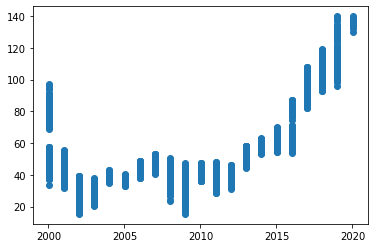

In [16]:
# daily opening prices 

fig, ax = plt.subplots()

ax.scatter(pd.to_datetime(df.index).year, df.open.values)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start+1, end, 5))
plt.show()

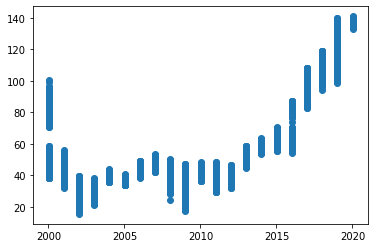

In [17]:
# daily high prices 

fig, ax = plt.subplots()

ax.scatter(pd.to_datetime(df.index).year, df.high.values)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start+1, end, 5))
plt.show()

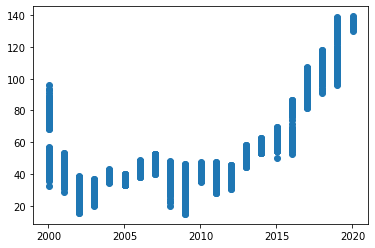

In [18]:
# daily low prices 

fig, ax = plt.subplots()

ax.scatter(pd.to_datetime(df.index).year, df.low.values)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start+1, end, 5))
plt.show()

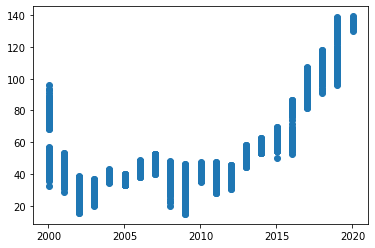

In [19]:
# daily closing prices 

fig, ax = plt.subplots()

ax.scatter(pd.to_datetime(df.index).year, df.low.values)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start+1, end, 5))
plt.show()

As we can see, all the price factors have similar shapes over time.

In [ ]:
Volume has a somewhat different shape, indicating a massive amount of trades around the time
of the financial crisis:

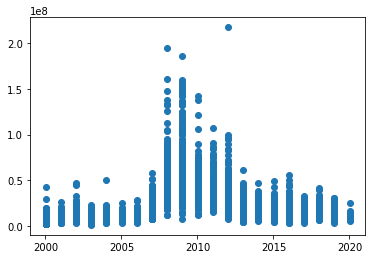

In [21]:
# daily volume prices 

fig, ax = plt.subplots()

ax.scatter(pd.to_datetime(df.index).year, df.volume.values)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start+1, end, 5))
plt.show()

Thee dividend amount is graphed by a histogram to give an idea of what the distribution looks like.

In [23]:
df['dividend amount'].unique()

array([0.  , 0.9 , 0.8 , 0.56, 0.5 , 0.48, 0.44, 0.4 , 0.38, 0.3 , 0.25,
       0.05, 0.34, 1.  , 0.32])

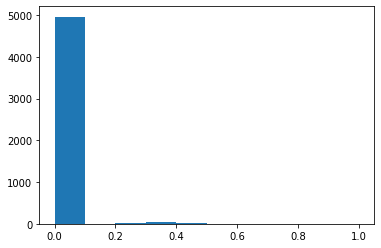

In [24]:
plt.hist(df['dividend amount'])
plt.show()

The vast majority of dividends pay less than 0.2, which is to be expected.
This will not be used in the project, but it was interesting to see.

Finally, the data is converted to a csv file and exported to the working directory:

In [26]:
df.to_csv('cleaned_data.csv')